# Regresión con SVM

Se tiene los siguientes datos de personas
- Gender
- Age Range
- Head Size(cm^3)
- Brain Weight(grams)

Y se desea predecir el peso del cerebro basándose en las otras variables

Importar dependencias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Leer los datos

In [2]:
dataset = pd.read_csv("../../datasets/headbrain/headbrain.csv", header=0)
dataset.head(15)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [3]:
dataset.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

Separación de X, y

In [4]:
#X = dataset.drop("Brain Weight(grams)", axis=1).values
X = dataset[['Head Size(cm^3)']]
y = dataset[["Brain Weight(grams)"]]
X

,Head Size(cm^3)
0,4512
1,3738
2,4261
3,3777
4,4177
...,...
232,3214
233,3394
234,3233
235,3352


In [5]:
y

,Brain Weight(grams)
0,1530
1,1297
2,1335
3,1282
4,1590
...,...
232,1110
233,1215
234,1104
235,1170


Escalado de variables

In [6]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Visualizar datos

<Figure size 640x480 with 0 Axes>

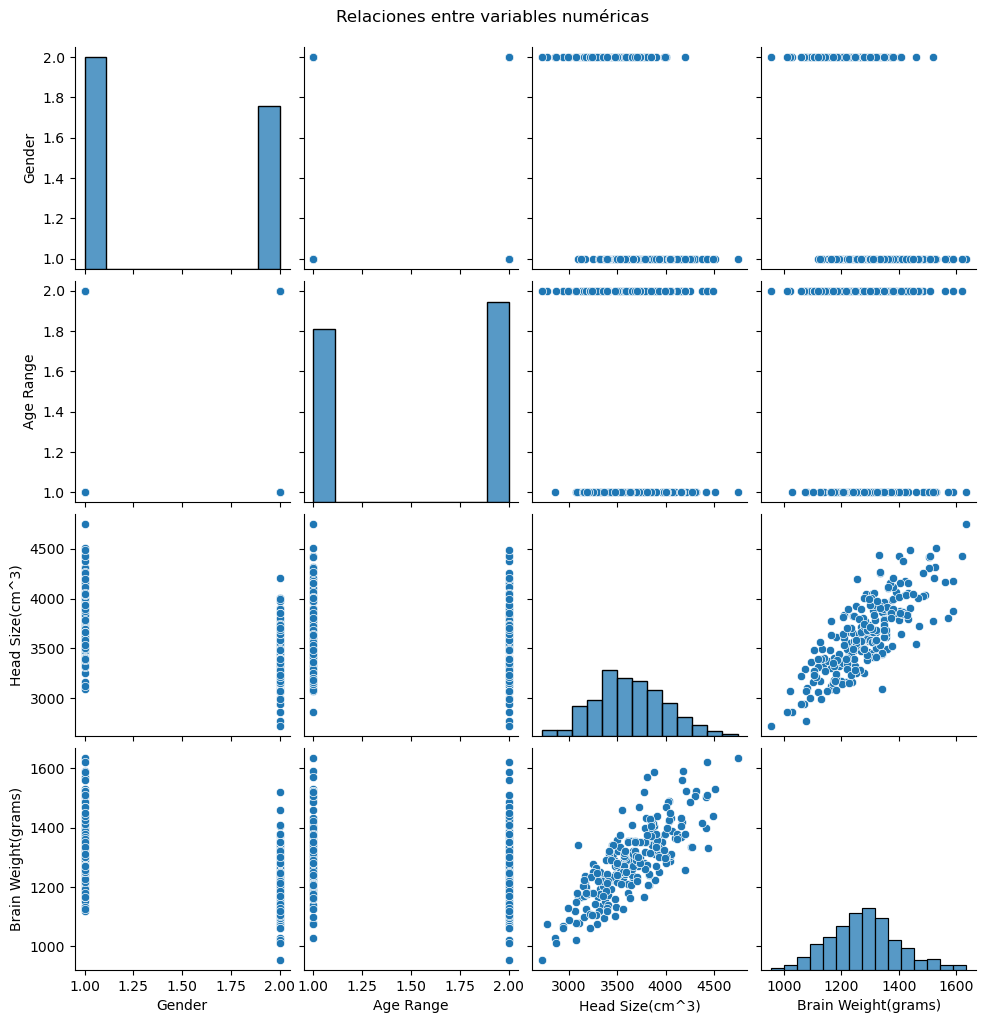

In [7]:
plt.figure()
sns.pairplot(dataset[['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)']])
plt.suptitle('Relaciones entre variables numéricas', y=1.02)
plt.show()

Separar datos

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenar el modelo

Diferentes Kernel a usar: 'linear', 'rbf', 'poly', 'sigmoid'

In [9]:
model = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
model.fit(X_train,np.ravel(y_train))

SVR(C=1000.0, gamma=0.1)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("\nEvaluación del modelo:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


Evaluación del modelo:
MAE: 0.4834835334894328
RMSE: 0.6005513129413947
R2: 0.6826402823791291


Cambiar de Kernel

In [24]:
model = SVR(kernel = 'linear', C = 1e5, gamma = 0.1)
model.fit(X_train,np.ravel(y_train))

SVR(C=100000.0, gamma=0.1, kernel='linear')

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("\nEvaluación del modelo:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


Evaluación del modelo:
MAE: 0.4618732156212288
RMSE: 0.5724788840153706
R2: 0.7116164364787937
